In [2]:
"this is some code"

'this is some code'

In [1]:
# IMPORT MAIN DATASET
import pandas as pd
ECL = pd.read_csv("export1.csv")
ECL.head()

,STICHTAG_MANDANT_LAUF_RECHT_AN,REPORTING_DATE,CLIENT,KEY_RUN,KEY_REPORTING_REGULATION,TRANSACTION_ID,KEY_TRANSACTION_CAT,GROUP_CONS_COMPANIES_ID,KEY_SECURITISATION_VIEW,KEY_PRIMARY_RISK_PARTNER,...,LGD_PR_UNCOL_IFRS_Y2,LGD_PR_UNCOL_IFRS_Y3,ASSET_CLASS_TRANSACTION_IRB,IME_TRANS_CLUSTER_ID,THRESHOLD_PD_ADJUSTED,FLAG_PRIVATI_LIKE,SCONF_NO_FIDO,SEGMENTO_INTERNO,CALIB_DRIVER,CLB_DRIVER_PRE_WS
0,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24036126_REPO,R,,B,P,...,0.0,0.0,BS,24036126_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
1,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24037558_REPO,R,,B,P,...,0.0,0.0,BA,24037558_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
2,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24038130_REPO,R,,B,P,...,0.0,0.0,BS,24038130_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
3,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,24081965_REPO,R,,B,P,...,0.0,0.0,BS,24081965_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN
4,19093002200AIFRSRCI,30-SEP-19,2200,57,IFRS,30374682_REPO,R,,B,P,...,0.0,0.0,BA,30374682_REPO_R,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
ECL.shape

(1593, 70)

In [3]:
# Drop all columns that have all NAs
ECL.dropna(axis=1, how='all', inplace=True)

In [4]:
ECL.shape

(1593, 58)

In [5]:
ECL.isnull().sum()

STICHTAG_MANDANT_LAUF_RECHT_AN       0
REPORTING_DATE                       0
CLIENT                               0
KEY_RUN                              0
KEY_REPORTING_REGULATION             0
TRANSACTION_ID                       0
KEY_TRANSACTION_CAT                  0
GROUP_CONS_COMPANIES_ID              0
KEY_SECURITISATION_VIEW              0
KEY_PRIMARY_RISK_PARTNER             0
AGE                                  0
DATE_END_TRANS_ADJ                   0
DATE_INCEPTION_TRANSACTION           0
DATE_RATING_AT_INCEPTION             0
DAT_PERF_FORBORNE_START              0
DAYS_DELAY_PR                        0
EAD1Y                                0
EADLT                                0
EFFECTIVE_INTEREST_RATE              0
EXPECTED_LOSS_1Y                     0
EXPECTED_LOSS_LT                     0
FLAG_UNRATED                         0
KEY_EAD_METHOD                       0
KEY_RATING_METHOD                    0
KEY_RAT_METH_AT_INC                  0
KEY_RATING_PROCEDURE_ID  

In [7]:
# Drop all columns that have any NAs as not relevant for the study
ECL.dropna(axis=1, how='any', inplace=True)

In [8]:
ECL.shape

(1593, 55)

In [82]:
ECL.columns

Index(['STICHTAG_MANDANT_LAUF_RECHT_AN', 'REPORTING_DATE', 'CLIENT', 'KEY_RUN',
       'KEY_REPORTING_REGULATION', 'TRANSACTION_ID', 'KEY_TRANSACTION_CAT',
       'GROUP_CONS_COMPANIES_ID', 'KEY_SECURITISATION_VIEW',
       'KEY_PRIMARY_RISK_PARTNER', 'AGE', 'DATE_END_TRANS_ADJ',
       'DATE_INCEPTION_TRANSACTION', 'DATE_RATING_AT_INCEPTION',
       'DAT_PERF_FORBORNE_START', 'DAYS_DELAY_PR', 'EAD1Y', 'EADLT',
       'EFFECTIVE_INTEREST_RATE', 'EXPECTED_LOSS_1Y', 'EXPECTED_LOSS_LT',
       'FLAG_UNRATED', 'KEY_EAD_METHOD', 'KEY_RATING_METHOD',
       'KEY_RAT_METH_AT_INC', 'KEY_RATING_PROCEDURE_ID',
       'KEY_RAT_PROCEDURE_ID_AT_INC', 'KEY_STAGE_ALLOCATION_QNT',
       'KEY_STAGE_ALLOCATION_QLT', 'KEY_LOW_CREDIT_RISK_EXEMPTION',
       'KEY_TRIG_QNT_ST_ALLOCAT', 'KEY_UNRATED_EL_METHOD',
       'KEY_UNRATED_ST_ALLOC_METHOD', 'LGD1Y', 'LGDLT', 'ORIGINAL_RATING',
       'ORIG_RATING_AT_INCEPTION', 'PD_1Y_WO_TR_AT_INCEPTION', 'PD1Y', 'PDLT',
       'RESIDUAL_MATURITY', 'PARTNER_ID', 'SE

In [9]:
ECL_study = ECL[['REPORTING_DATE', 'PARTNER_ID', 'TRANSACTION_ID', 'EAD1Y', 'EXPECTED_LOSS_1Y', 'PD1Y', 'KEY_LOW_CREDIT_RISK_EXEMPTION', 'ORIGINAL_RATING', 'ORIG_RATING_AT_INCEPTION']]
ECL_study.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
0,30-SEP-19,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5
1,30-SEP-19,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6
2,30-SEP-19,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8
3,30-SEP-19,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5
4,30-SEP-19,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7


In [10]:
ECL_study.dtypes

REPORTING_DATE                    object
PARTNER_ID                         int64
TRANSACTION_ID                    object
EAD1Y                            float64
EXPECTED_LOSS_1Y                 float64
PD1Y                             float64
KEY_LOW_CREDIT_RISK_EXEMPTION     object
ORIGINAL_RATING                   object
ORIG_RATING_AT_INCEPTION          object
dtype: object

In [23]:
ECL_study["PARTNER_ID"] = ECL_study["PARTNER_ID"].astype(str)

<ipython-input-23-84985ffd88cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ECL_study["PARTNER_ID"] = ECL_study["PARTNER_ID"].astype(str)


In [25]:
ECL_study.dtypes

REPORTING_DATE                    object
PARTNER_ID                        object
TRANSACTION_ID                    object
EAD1Y                            float64
EXPECTED_LOSS_1Y                 float64
PD1Y                             float64
KEY_LOW_CREDIT_RISK_EXEMPTION     object
ORIGINAL_RATING                   object
ORIG_RATING_AT_INCEPTION          object
dtype: object

In [26]:
ECL_study["REPORTING_DATE"] = pd.to_datetime(ECL_study["REPORTING_DATE"])

<ipython-input-26-ec5b10881b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ECL_study["REPORTING_DATE"] = pd.to_datetime(ECL_study["REPORTING_DATE"])


In [27]:
ECL_study.dtypes

REPORTING_DATE                   datetime64[ns]
PARTNER_ID                               object
TRANSACTION_ID                           object
EAD1Y                                   float64
EXPECTED_LOSS_1Y                        float64
PD1Y                                    float64
KEY_LOW_CREDIT_RISK_EXEMPTION            object
ORIGINAL_RATING                          object
ORIG_RATING_AT_INCEPTION                 object
dtype: object

In [14]:
# ECL_study.astype({"PARTNER_ID":str})

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
0,30-SEP-19,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5
1,30-SEP-19,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6
2,30-SEP-19,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8
3,30-SEP-19,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5
4,30-SEP-19,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7
...,...,...,...,...,...,...,...,...,...
1588,30-JUN-21,24158450,IS_SECTRANS_XS0750894577_FVTOCI_21,4.693901e+07,91.67,0.000006,J,S3,S3
1589,30-JUN-21,24036841,NO_CURRENT__100000010_1000001_11_USD,3.116480e+06,518.04,0.000250,N,B4,B4
1590,30-JUN-21,24036038,NO_CURRENT__100000010_1000002_11_GBP,7.410084e+04,16.07,0.000928,N,B6,B6
1591,30-JUN-21,30374682,NO_CURRENT__100000011_1000000_11_EUR,2.793028e+07,19525.24,0.001787,N,B7,B7


In [28]:
ECL_study.dtypes

REPORTING_DATE                   datetime64[ns]
PARTNER_ID                               object
TRANSACTION_ID                           object
EAD1Y                                   float64
EXPECTED_LOSS_1Y                        float64
PD1Y                                    float64
KEY_LOW_CREDIT_RISK_EXEMPTION            object
ORIGINAL_RATING                          object
ORIG_RATING_AT_INCEPTION                 object
dtype: object

In [29]:
ECL_study.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7


In [ ]:
#Importing Pandas and a reading a file (CSV) into a Pandas Data Frame using the relative path

In [30]:
import pandas as pd
partner = pd.read_csv("export2Partner.csv")

In [ ]:
# Initial exploration of data in preparation of subsetting: I am interested in Partner ID and Country Code

In [31]:
partner.head()

,PARTNER_ID,STICHTAG,MANDANT,STICHTAG_MANDANT_LAUF,SL_ABWEICH_LAENDERRISIKOLAND,SL_POLITISCHES_SITZLAND,SL_RECHTLICHES_LAND,PARTNERART,KZ_MANDANTENINTERNER_PARTNER,SL_RECHTSFORM,...,KZ_SME_THRESHOLD_NOT_EXC_STA,SL_CVA_COUNTERPARTY_CLASS,KZ_ELIGIBLE_SETTING_MATUR_1_Y,DAT_LEGAL_PROC_INIT,SL_ENTERPRISE_SIZE,SL_STATUS_LEGAL_PROC,SL_INTRAGROUP_EXPOSURE_CRR_113,SL_LEGAL_FORM_ECB,SL_TYPE_OF_ENTITY,KZ_GOVERNMENT_SUPPORT
0,24045513,30-JUN-21,2200,21063002200A,XXX,IE,7,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
1,24038001,30-JUN-21,2200,21063002200A,XXX,BE,17,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
2,24053273,30-JUN-21,2200,21063002200A,XXX,XIO,912,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
3,87010403,30-JUN-21,2200,21063002200A,XXX,DE,39,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN
4,23670755,30-JUN-21,2200,21063002200A,XXX,NL,3,XX,N,XXX,...,N,XXX,N,01-JAN-00,L,N,X,XXXXXX,XX,NaN


In [32]:
partner.shape

(76, 82)

In [19]:
partner.columns

Index(['PARTNER_ID', 'STICHTAG', 'MANDANT', 'STICHTAG_MANDANT_LAUF',
       'SL_ABWEICH_LAENDERRISIKOLAND', 'SL_POLITISCHES_SITZLAND',
       'SL_RECHTLICHES_LAND', 'PARTNERART', 'KZ_MANDANTENINTERNER_PARTNER',
       'SL_RECHTSFORM', 'SL_ORGANBEZIEHUNG', 'SL_SONDERPARTNER_GS1',
       'SL_TEILPORTFOLIO_STA', 'SL_TEILPORTFOLIO_IRB', 'DAT_GEBURT',
       'SL_LEISTUNGSSTATUS', 'KZ_15_TAGE_WAHLRECHT', 'KZ_ANONYMISIERUNG',
       'KZ_PRIVILEGIERTE_INSTITUTION', 'KZ_HANDWERKER', 'KZ_SPV',
       'KZ_BEAUF_INVESTMENTF_PENSIONSK', 'PARTNERNAME', 'PARTNERVORNAME',
       'PARTNERNACHNAME', 'SITZ_ORT', 'SITZ_POSTLEITZAHL', 'SITZ_STRASSE',
       'GEBURTSORT', 'TITEL', 'SL_HINWEIS', 'REPORTINGINFORMATION',
       'JAHRESEINKOMMEN', 'SL_PARTNERKLASSE_INTERN',
       'KZ_LEISTUNGSSTATUS_AUTOMATISCH', 'SL_UNTERNEHMENSART_AUFSICHTSR',
       'KZ_LANGFRISTIGE_KUNDENBEZ', 'KZ_HEDGEFONDS',
       'KZ_UNMITTELBARE_AUSFALLERKENN', 'SL_GEWERBE',
       'KZ_SCHULDNERUEBERWACHUNG', 'LIEFERSYSTEM_ID',
      

In [33]:
# After having identified the columns containing the country codes per counterparty, I create a subset
# of the table partner called "CPTY_Country_codes". I will need this to merge it with GDP information
# per country  during the COVID pandemic.
CPTY_Country_codes = partner[["PARTNER_ID", 'SL_POLITISCHES_SITZLAND', 'SL_LEGAL_COUNTRY_ISO_3166_1_A2']]
CPTY_Country_codes.head()

,PARTNER_ID,SL_POLITISCHES_SITZLAND,SL_LEGAL_COUNTRY_ISO_3166_1_A2
0,24045513,IE,IE
1,24038001,BE,BE
2,24053273,XIO,LU
3,87010403,DE,CH
4,23670755,NL,NL


In [30]:
CPTY_Country_codes.shape

(76, 3)

In [12]:
CPTY_Country_codes.dtypes

PARTNER_ID                         int64
SL_POLITISCHES_SITZLAND           object
SL_LEGAL_COUNTRY_ISO_3166_1_A2    object
dtype: object

In [34]:
CPTY_Country_codes["PARTNER_ID"] = CPTY_Country_codes["PARTNER_ID"].astype(str)

<ipython-input-34-143d4bb2144e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPTY_Country_codes["PARTNER_ID"] = CPTY_Country_codes["PARTNER_ID"].astype(str)


In [35]:
CPTY_Country_codes.dtypes

PARTNER_ID                        object
SL_POLITISCHES_SITZLAND           object
SL_LEGAL_COUNTRY_ISO_3166_1_A2    object
dtype: object

In [22]:
# check if country codes are the same in both columns
CPTY_Country_codes["SL_POLITISCHES_SITZLAND"].equals(CPTY_Country_codes["SL_LEGAL_COUNTRY_ISO_3166_1_A2"])

KeyError: 'SL_POLITISCHES_SITZLAND'

In [21]:
CPTY_Country_codes.rename(columns={"SL_POLITISCHES_SITZLAND": "COUNTRY_OF_RISK", "SL_LEGAL_COUNTRY_ISO_3166_1_A2" : "LEGAL_COUNTRY"}, inplace=True)
CPTY_Country_codes.head()

,PARTNER_ID,COUNTRY_OF_RISK,LEGAL_COUNTRY,Diff
0,24045513,IE,IE,0
1,24038001,BE,BE,0
2,24053273,XIO,LU,0
3,87010403,DE,CH,0
4,23670755,NL,NL,0


In [41]:
CPTY_Country_codes["Diff"].sum()

'0000000000000000000000000000000000000000000000000000000000000000000000000000'

In [38]:
ECL_Study_CPTY_Country_Codes = ECL_study.merge(CPTY_Country_codes, how="left")
ECL_Study_CPTY_Country_Codes.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,SL_POLITISCHES_SITZLAND,SL_LEGAL_COUNTRY_ISO_3166_1_A2
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5,FR,FR
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6,DE,DE
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8,IT,IT
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5,FR,FR
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT


In [39]:
ECL_Study_CPTY_Country_Codes.shape

(1593, 11)

In [41]:
ECL_Study_CPTY_Country_Codes.dtypes

REPORTING_DATE                    datetime64[ns]
PARTNER_ID                                object
TRANSACTION_ID                            object
EAD1Y                                    float64
EXPECTED_LOSS_1Y                         float64
PD1Y                                     float64
KEY_LOW_CREDIT_RISK_EXEMPTION             object
ORIGINAL_RATING                           object
ORIG_RATING_AT_INCEPTION                  object
SL_POLITISCHES_SITZLAND                   object
SL_LEGAL_COUNTRY_ISO_3166_1_A2            object
dtype: object

In [73]:
ECL_Study_CPTY_Country_Codes["EL_1Y/EAD_1Y"] = ECL_Study_CPTY_Country_Codes["EXPECTED_LOSS_1Y"]/ECL_Study_CPTY_Country_Codes["EAD1Y"]*10000
ECL_Study_CPTY_Country_Codes.head()

,REPORTING_DATE,PARTNER_ID,TRANSACTION_ID,EAD1Y,EXPECTED_LOSS_1Y,PD1Y,KEY_LOW_CREDIT_RISK_EXEMPTION,ORIGINAL_RATING,ORIG_RATING_AT_INCEPTION,SL_POLITISCHES_SITZLAND,SL_LEGAL_COUNTRY_ISO_3166_1_A2,EL_1Y/EAD_1Y
0,2019-09-30,24036126,24036126_REPO,3.359181e+05,156.94,0.001221,N,B5,B5,FR,FR,4.671972
1,2019-09-30,24037558,24037558_REPO,1.211426e+07,6042.41,0.001601,N,B6,B6,DE,DE,4.987851
2,2019-09-30,24038130,24038130_REPO,1.476728e+05,171.94,0.002555,N,B8,B8,IT,IT,11.643306
3,2019-09-30,24081965,24081965_REPO,8.414928e+05,419.59,0.001240,N,B5,B5,FR,FR,4.986258
4,2019-09-30,30374682,30374682_REPO,1.032456e+08,91134.62,0.002076,N,B7,B7,IT,IT,8.826970


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1108: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

In [67]:
#groupby Date and counterparty
ECL_Study_CPTY_Country_Codes.groupby(["REPORTING_DATE", "PARTNER_ID"]).mean()

EAD1Y  EXPECTED_LOSS_1Y      PD1Y
REPORTING_DATE PARTNER_ID                                          
2019-09-30     1432750     2.252832e+08     236550.050000  0.001739
               17461434    4.529688e+07      69066.430000  0.001908
               1754026     8.539845e+06       4609.245000  0.001212
               19854145    2.089427e+07       1956.336667  0.000899
               24030685    1.115781e+06         96.690000  0.000512
...                                 ...               ...       ...
2021-06-30     34944058    1.584438e+07        130.022000  0.000027
               36624468    2.163111e+07         88.475714  0.000012
               39582211    2.144934e+07       1877.840000  0.000969
               84785786    1.082811e+07        261.910000  0.000278
               9132323     8.079198e+07      14632.286316  0.000470

[267 rows x 3 columns]

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

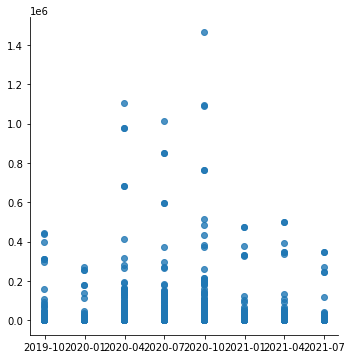

In [70]:
g = sns.lmplot(data=ECL_Study_CPTY_Country_Codes, x="REPORTING_DATE", y="EXPECTED_LOSS_1Y")
plt.xticks(rotation=90)